The finding of adequate hyper parameters is crucial to improve the performance and generalization of machine learning models. There are several methods described in modern literature that can help to find the best fitting hyper parameters. The performance is tested in different dataset that are tested and well studied, such as MINST. Hyper parameters (HP) are external to the learning process but significantly impact model performance. HP are external to the learning process but significantly impact model performance. Effective tuning typically requires domain expertise or computationally expensive methods like brute-force search.
Effective tuning typically requires domain expertise or computationally expensive methods like brute-force search In [1, 2, 3], the Bayesian optimization is explored.  Bayesian optimization leverages prior knowledge to update posterior distributions based on sample data, guiding the search for optimal hyperparameter configurations efficiently. Traditional approaches like grid search and random search are computationally expensive and less effective in high-dimensional spaces. Bayesian optimization offers a more efficient alternative, particularly for expensive, black-box objective functions. 
In [1] the use of Bayesian optimization is explored for tuning hyper parameters in machine learning models, which is critical for improving model performance. The study proposes a method using Bayesian optimization with Gaussian processes. Traditional approaches like grid search and random search are computationally expensive and less effective in high-dimensional spaces. Bayesian optimization offers a more efficient alternative, particularly for expensive, black-box objective functions. The results were conducted on machine learning models like random forests, neural networks (CNN and RNN), and deep forests (gcForest). Bayesian optimization demonstrated significant improvements in prediction accuracy and computational efficiency compared to traditional methods.The results confirm that Bayesian optimization outperforms other optimization techniques in terms of speed and achieving better model performance, especially in scenarios with limited computational resources or high-dimensional hyperparameter spaces.

In [2] it is stated that complex models like Deep Belief Networks (DBNs) have numerous hyper parameters, making manual optimization inefficient and inconsistent.
The difficulty in tuning these models hinders reproducibility and progress in machine learning research. Therefore, the proposed approaches is based on
Random Search, a method where hyper parameters are sampled randomly from predefined distributions. It is efficient for simple problems but struggles with complex models like DBNs. In order to improve this disadvantage, the Sequential Model-Based Optimization is introduced.
This method approximates the loss function with a surrogate model to guide the search. Two specific variants of the methods are explained: Gaussian Process and the
Tree-Structured Parzen Estimator. Both methods were tested on DBNs with up to 32 hyper parameters across tasks like image classification on datasets such as MNIST and MRBI. The results show, that Random search matched human manual optimization for simple tasks but failed for harder datasets.
Tree-Structured Parzen Estimator consistently outperformed both random search and manual tuning, achieving better accuracy and efficiency.The Gaussian Process was effective but less efficient than TPE due to computational overhead.

In [3], the results proves that experiments were conducted on machine learning models like random forests, neural networks (CNN and RNN), and deep forests (gcForest). Bayesian optimization demonstrated significant improvements in prediction accuracy and computational efficiency compared to traditional methods.
The results confirm that Bayesian optimization outperforms other optimization techniques in terms of speed and achieving better model performance, especially in scenarios with limited computational resources or high-dimensional hyperparameter spaces.





[1] Hyunghun Cho et al.: *Basic Enhancement Strategies When Using Bayesian Optimization for Hyperparameter Tuning of Deep Neural Networks*, Special section on scalable deeo learning for big data, VOLUME 8, Digital Object Identifier 10.1109/ACCESS.2020.2981072, pp. 52588-52608 IEEE Access, 2020

[2] James Bergstra et al: *Algorithms for Hyper-Parameter Optimization*, NIPS'11: Proceedings of the 24th International Conference on Neural Information Processing Systems,  pp. 2546 - 2554, 2011

[3] Jia Wu et al: *Hyperparameter Optimization for Machine Learning Models Based on Bayesian Optimization*, Journal of Electronic Science , VOL. 17, NO. 1,Digital Object Identifier:10.11989/JEST.1674-862X.80904120, pp.26 - 40, 2019, 

Prep data and environment and Import MINST dataset 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from skopt import BayesSearchCV
from skopt import gp_minimize
# obejective function
from sklearn.model_selection import cross_val_score
from skopt.utils import use_named_args

## necessary libraries to build model tensorflwo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


In [70]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the features
X = X / 255.0

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)



In [71]:
# Define the model
model = RandomForestClassifier(random_state=42)

https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html\
https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html#sphx-glr-auto-examples-bayesian-optimization-py


In [ ]:
# Define the search space
search_space_MNIST = [
    Integer(10, 200, name='n_estimators'),       # Number of trees
    Integer(2, 32, name='max_depth'),            # Maximum depth of the trees
    Real(0.1, 1.0, name='max_features'),         # Fraction of features to consider
    Integer(2, 20, name='min_samples_split')     # Minimum samples required to split
]

In [73]:
# Define the objective function
@use_named_args(search_space_MNIST)
def objective(n_estimators, max_depth, max_features, min_samples_split):
    # Set model parameters
    model.set_params(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split
    )
    
    # Cross-validate the model
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Return the negative mean accuracy (gp_minimize minimizes)
    return -scores.mean()

In [84]:
# Perform Bayesian Optimization
result = gp_minimize(
    func=objective,            # Objective function
    dimensions=search_space_MNIST,   # Search space
    acq_func='EI',             # Expected Improvement
    n_calls=15,                # Number of iterations
    random_state=42            # For reproducibility
)

# Print the best results
print("Best Score (negative mse):", result.fun)
print("Best Parameters:", result.x)

ValueError: Input y contains NaN.

In [62]:
from skopt.plots import plot_convergence
plot_convergence(result)

NameError: name 'result' is not defined

In [ ]:
# Define the BayesSearchCV object
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=50,                # Number of optimization iterations
    cv=3,                     # Cross-validation folds
    scoring='accuracy',       # Metric for evaluation
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

TypeError: BayesSearchCV.__init__() got an unexpected keyword argument 'acq_func'

In [28]:
# Fit the BayesSearchCV to the training data
bayes_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Output the best parameters and score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validated Accuracy:", bayes_search.best_score_)


In [ ]:
# Use the best model for predictions
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

In [75]:
print(__doc__)

import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

Automatically created module for IPython interactive environment


In [76]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

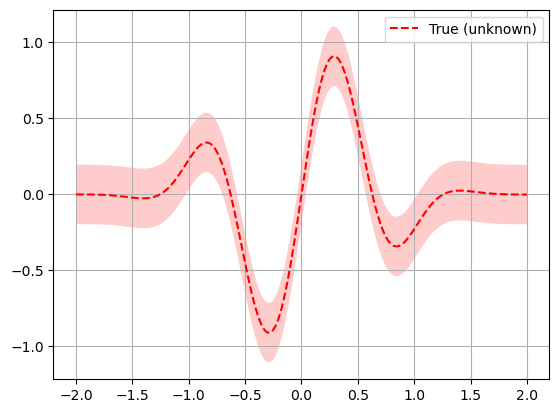

In [77]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [78]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

In [79]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

'x^*=-0.3552, f(x^*)=-1.0079'

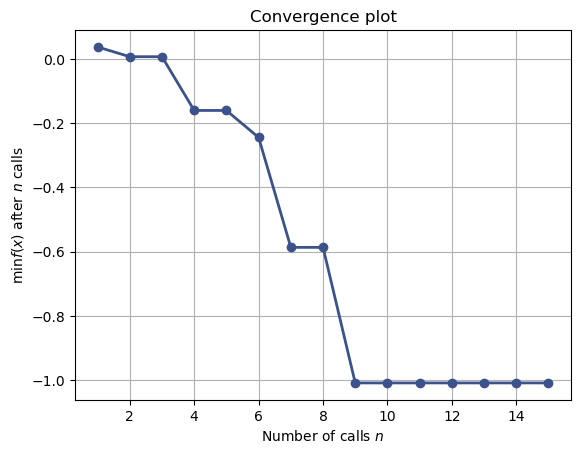

In [80]:
from skopt.plots import plot_convergence
plot_convergence(res);

In [81]:
plt.rcParams["figure.figsize"] = (8, 14)


def f_wo_noise(x):
    return f(x, noise_level=0)

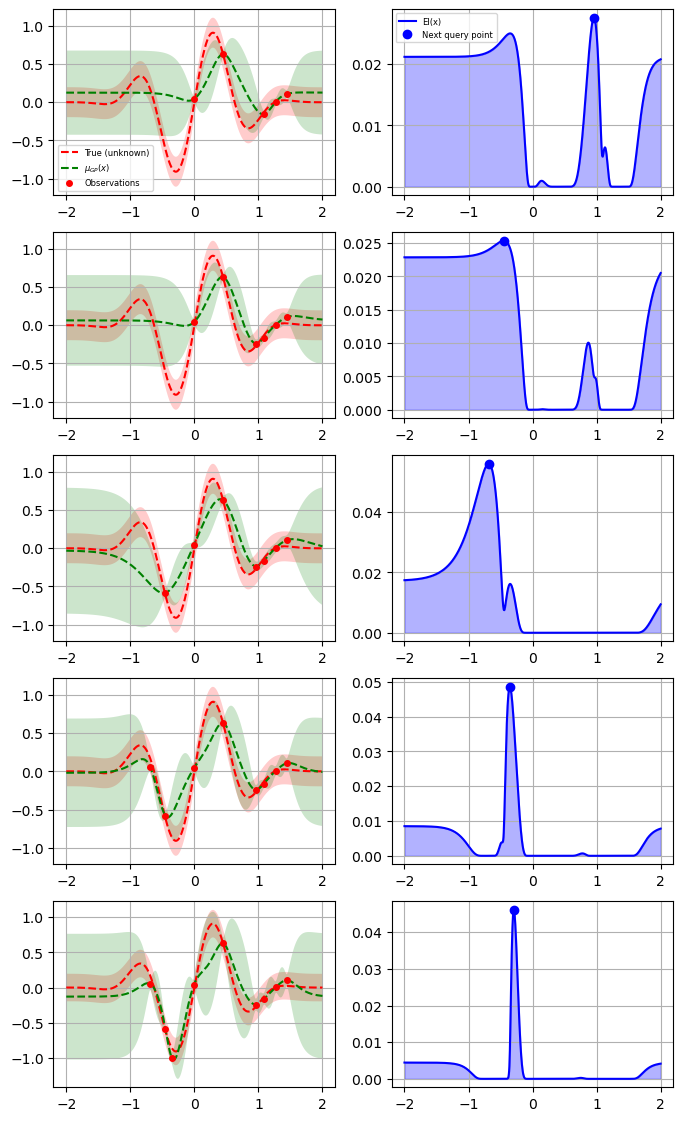

In [82]:
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()